[View in Colaboratory](https://colab.research.google.com/github/SendilCannane/Tensorflow/blob/master/MNIST_Tensorflow.ipynb)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from mnist import MNIST
from tensorflow.examples.tutorials.mnist import input_data 
mnist_data = input_data.read_data_sets("MNIST_data/",one_hot=True)



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
data_train = mnist_data.train
data_validation = mnist_data.validation
data_test = mnist_data.test

In [0]:
#!pip install -q tflearn

In [8]:
print("Size of:")
print("- Training-set:\t\t{}".format(mnist_data.train))
print("- Validation-set:\t{}".format(data_validation))
print("- Test-set:\t\t{}".format(data_test))

Size of:
- Training-set:		<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f10c5e4f320>
- Validation-set:	<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f10ce4f7b38>
- Test-set:		<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f10b8074be0>


In [9]:
data_train._images[0:4,0:32]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [10]:
data_test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
data_test.labels[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
data_test.labels[0:11]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
data_test.cls = np.argmax(data_test.labels, axis=1)
data_test.cls[0:5]

array([7, 2, 1, 0, 4])

In [14]:
images = data_test.images.reshape([-1, 28, 28])
print(images.shape)
# label
labels = data_test.labels
print(labels)

(10000, 28, 28)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
data_test._images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
data_test.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
data_test.images[5].shape

(784,)

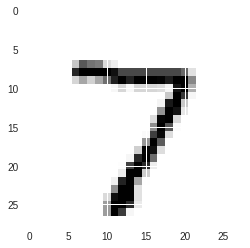

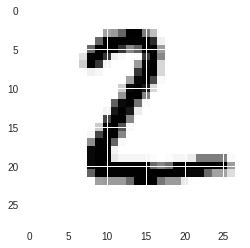

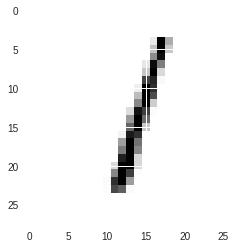

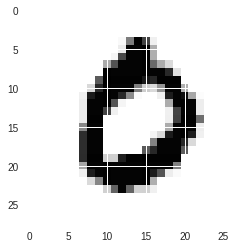

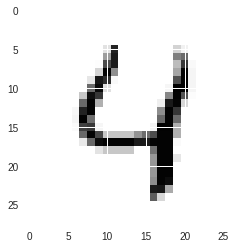

In [18]:
for i in range(5):
    img = data_test.images[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [0]:
img_shape = data_test.images.shape

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(28,28), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

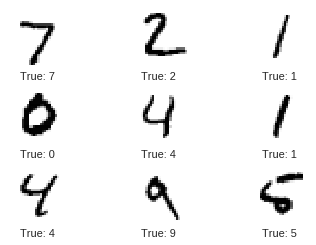

In [21]:
images = data_test.images[0:9]

# Get the true classes for those images.
cls_true = data_test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [22]:
img_size_flat = data_test.images.shape
img_size_flat

# 7840000

#train_size = data_train.images.size
#train_size

#43120000

(10000, 784)

In [0]:
#img_size = data_test.images[1].shape
img_size = 784

In [0]:
#label_size = data_test.labels[1].shape
label_size = 10

In [0]:
x = tf.placeholder(tf.float32, [None, img_size])

In [0]:

y_true = tf.placeholder(tf.float32, [None, label_size])

In [0]:

y_true_cls = tf.placeholder(tf.int64, [None])

In [0]:
#sess = tf.Session()
#sess.run(y_true_cls)

In [0]:
weights = tf.Variable(tf.zeros([img_size, label_size]))

In [0]:

biases = tf.Variable(tf.zeros([label_size]))

In [31]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(biases)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
logits = tf.matmul(x, weights) + biases

In [0]:
y_pred = tf.nn.softmax(logits)

y_pred_cls = tf.argmax(y_pred, axis=1)

In [0]:

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y_true)

In [0]:
cost = tf.reduce_mean(cross_entropy)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
session = tf.Session()

In [0]:
session.run(tf.global_variables_initializer())

In [0]:
batch_size = 100

In [0]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data_test.next_batch(batch_size)
        feed_dict_train = {x: x_batch,y_true: y_true_batch}
        session.run(optimizer, feed_dict=feed_dict_train) 
        print(logits)
#      --
     # for step in range(1, num_steps+1):
      
        # Run optimization op (backprop)
      #  sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
       # if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
       #     loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
        #                                                         Y: batch_y})
     #       print("Step " + str(step) + ", Minibatch Loss= " + \
         #         "{:.4f}".format(loss) + ", Training Accuracy= " + \
        #          "{:.3f}".format(acc))

   # print("Optimization Finished!")
   #   --
        
      #  x_batch, y_true_batch, _ = data_test.batch(batch_size=batch_size)
        
       
     

In [0]:

feed_dict_test = {x: data_test.images,
                  y_true: data_test.labels,
                  y_true_cls: data_test.cls}

Here, the actual execution begins (i.e at acc)
Along with the it invokes the accuracy() function - in turn

In [0]:
def print_accuracy():
   
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [0]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data_test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data_test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data_test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [0]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [48]:
print_accuracy()

Accuracy on test-set: 9.8%


In [0]:
plot_example_errors()

In [4]:
optimize(num_iterations=1)

NameError: ignored

In [76]:
print_accuracy()

Accuracy on test-set: 52.3%
